## Import Data

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import seaborn as sns

In [3]:
from statsmodels.tsa.api import VAR

In [4]:
# importing data
df = pd.read_csv('household_power_consumption.txt', sep=';')

/home/kirmani/anaconda3/envs/env1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [6]:
#checking nan values in data
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

### Preprocessing Data

In [7]:
#reimporting data by changing Date, Time columns from string to date time stamp
df1 = pd.read_csv('household_power_consumption.txt', sep = ';', parse_dates = { 'DATE' : ['Date', 'Time']},
                 infer_datetime_format = True, low_memory = False, na_values = ['nan', '?'] )

In [8]:
df1.head()

,DATE,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [9]:
# checking nan values
df1.isnull().sum()

DATE                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [10]:
df1.shape

(2075259, 8)

In [11]:
#all types of features in dataset
df1.dtypes

DATE                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [12]:
#This function extracts datetime features of passed data
def Date_Time(dataFrame):
    dataFrame['Day'] = dataFrame['DATE'].dt.dayofweek
    dataFrame['Month'] = dataFrame['DATE'].dt.month
    dataFrame['Year'] = dataFrame['DATE'].dt.year
    dataFrame['Hour'] = dataFrame['DATE'].dt.hour
    dataFrame['Minute'] = dataFrame['DATE'].dt.minute
    
    dataFrame = dataFrame.drop(labels=['DATE'], axis=1)
    dataFrame = dataFrame[['Voltage', 'Global_intensity', 'Day', 'Month',
                           'Year', 'Hour','Minute','Global_active_power']]
    dataFrame = dataFrame.dropna()
    dataFrame = dataFrame.sort_values(by=['Year','Month','Day','Hour'])
    dataFrame = dataFrame.reset_index(drop=True)
    return(dataFrame)

In [13]:
#This function removes outliers
def remove_outliers(data):
    without_outlier = data[np.abs(data["Hour"]
                                         -data["Hour"].mean())<=(3*data["Hour"].std())]

    return without_outlier

In [14]:
#ectracting datetime features
power_df = Date_Time(df1)

In [15]:
power_df.shape

(2049280, 8)

In [16]:
power_df.head()

,Voltage,Global_intensity,Day,Month,Year,Hour,Minute,Global_active_power
0,246.17,1.2,0,12,2006,0,0,0.278
1,246.40,1.0,0,12,2006,0,1,0.238
2,246.46,0.8,0,12,2006,0,2,0.208
3,245.94,0.8,0,12,2006,0,3,0.206
4,245.98,0.8,0,12,2006,0,4,0.206


In [17]:
#removing outliers
power_df = remove_outliers(power_df)

## Data Plots

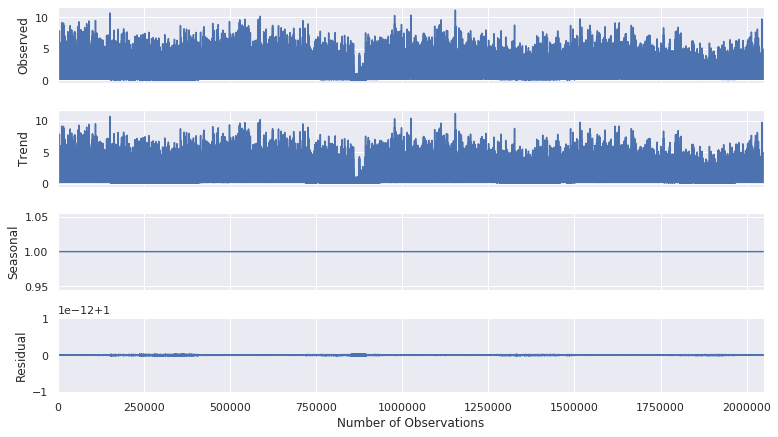

In [18]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11,6)})
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(power_df['Global_active_power'], model='multiplicative', freq=1)
result.plot()
plt.xlabel('Number of Observations')
plt.show()

#### Time Series Distribution

Text(0, 0.5, 'Values')

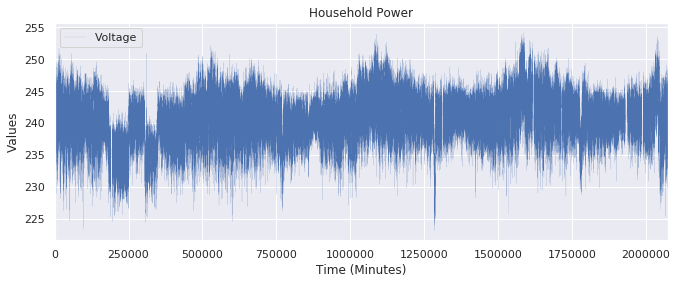

In [25]:
sns.set(rc={'figure.figsize':(11,4)})
power_df[['Voltage']].plot(linewidth=0.1, title='Household Power')
plt.xlabel('Time (Minutes)')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

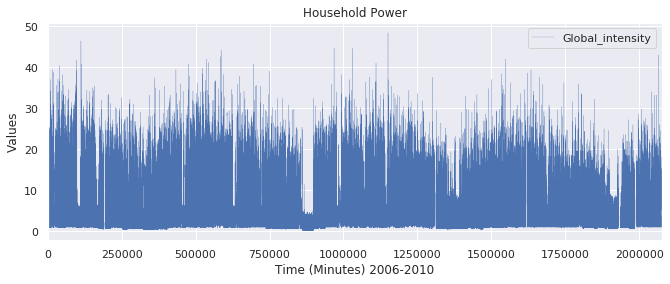

In [26]:
sns.set(rc={'figure.figsize':(11,4)})
power_df[['Global_intensity']].plot(linewidth=0.2, title='Household Power')
plt.xlabel('Time (Minutes) 2006-2010')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

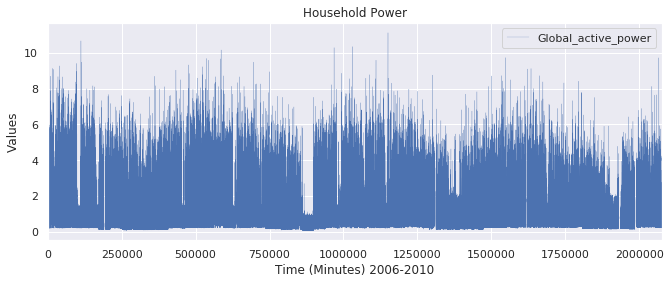

In [27]:
sns.set(rc={'figure.figsize':(11,4)})
power_df[['Global_active_power']].plot(linewidth=0.2, title='Household Power')
plt.xlabel('Time (Minutes) 2006-2010')
plt.ylabel('Values')

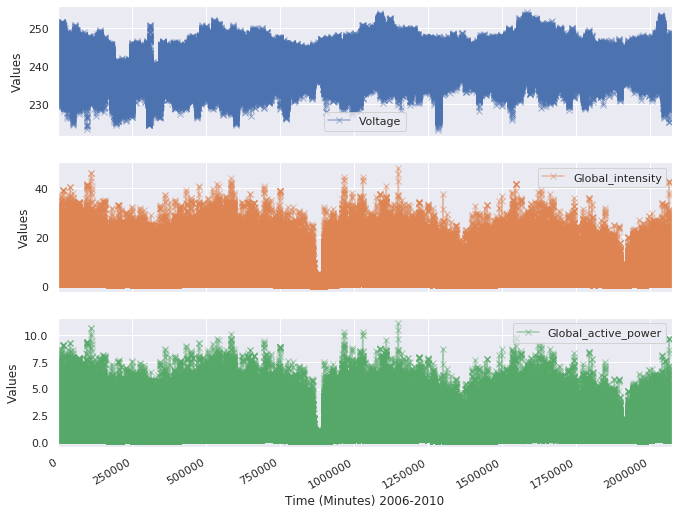

In [28]:
cols_plot = ['Voltage', 'Global_intensity','Global_active_power']
axes = power_df[cols_plot].plot(marker='x', alpha=0.5, linestyle='-', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Values')
    ax.set_xlabel('Time (Minutes) 2006-2010')

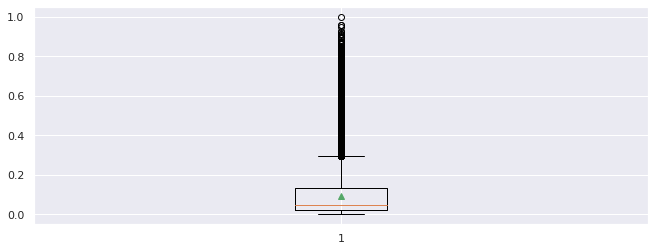

In [29]:
plt.boxplot(power_df1['Global_active_power'], showmeans=True)
plt.show()

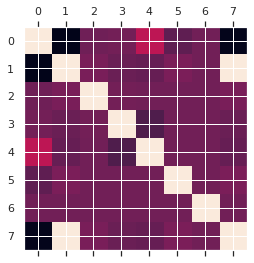

In [30]:
plt.matshow(power_df1.corr())
plt.show()

In [34]:
power_df1['Day'].unique()

array([5., 6., 0., 1., 2., 3., 4.])

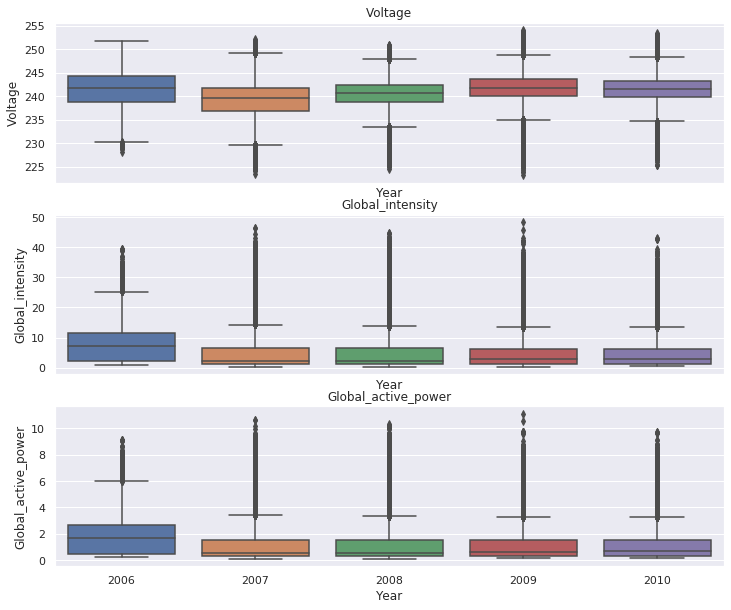

In [35]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
for name, ax in zip(['Voltage', 'Global_intensity', 'Global_active_power'], axes):
    sns.boxplot(data=power_df, x='Year', y=name, ax=ax)
    #ax.set_ylabel('')
    ax.set_title(name)

#### Heat Map

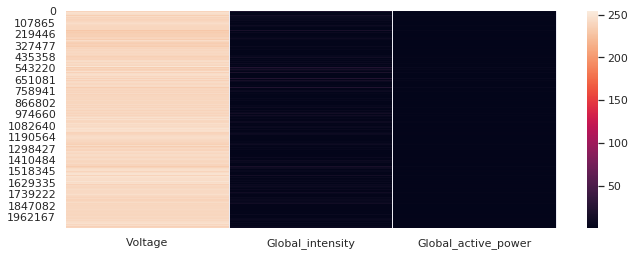

In [38]:
sns.heatmap(power_df[['Voltage', 'Global_intensity', 'Global_active_power']])

#### Histograms and Curve Distribution

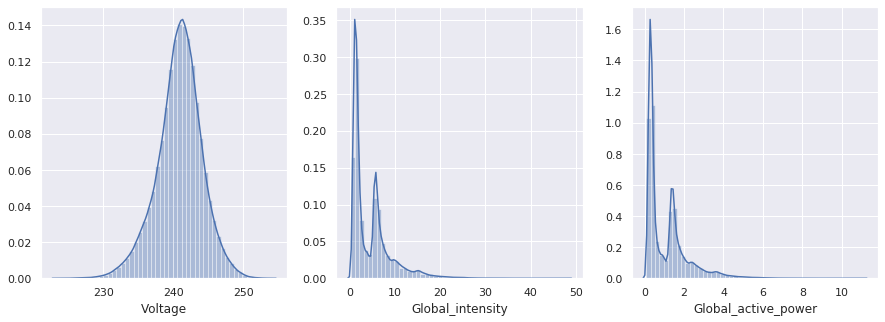

In [39]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
for name, ax in zip(['Voltage', 'Global_intensity', 'Global_active_power'], axes):
    sns.distplot(power_df[name], ax=ax)

#### Correlation

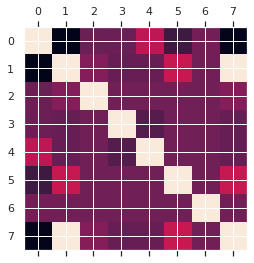

In [40]:
plt.matshow(power_df.corr())
plt.show()

#### Scatter Plot

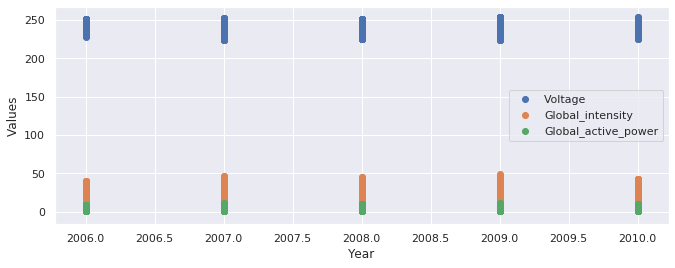

In [42]:
plt.scatter(power_df['Year'],power_df['Voltage'])
plt.scatter(power_df['Year'],power_df['Global_intensity'])
plt.scatter(power_df['Year'],power_df['Global_active_power'])
plt.legend(['Voltage', 'Global_intensity', 'Global_active_power'])
plt.xlabel('Year')
plt.ylabel('Values')
plt.show()

#### Trend Line

Text(0.5, 0, 'Days')

/home/kirmani/anaconda3/envs/env1/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/kirmani/anaconda3/envs/env1/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


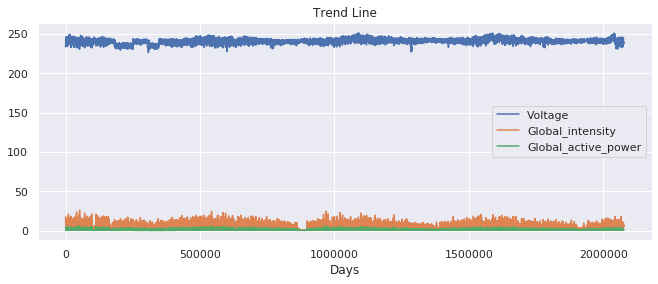

In [43]:
plt.plot(power_df['Voltage'].rolling(window=150, center=True, min_periods=30).mean())
plt.plot(power_df['Global_intensity'].rolling(window=150, center=True, min_periods=30).mean())
plt.plot(power_df['Global_active_power'].rolling(window=150, center=True, min_periods=30).mean())
plt.legend(['Voltage', 'Global_intensity', 'Global_active_power'])
plt.title('Trend Line')
plt.xlabel('Days')

### Divide Data into Train and Test Set

In [19]:
def train_test_data(data):
    x = np.array(data.iloc[:,:]) # selecting features from data
    y = np.array(data.iloc[:,-1])  # selecting features from data
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, shuffle= False)
    
    return (x_train, x_test, y_train, y_test)

In [20]:
# creating train/test variables from data
x_train, x_test, y_train, y_test = train_test_data(power_df)

In [21]:
x_train.shape

(1639424, 8)

In [22]:
x_test.shape

(409856, 8)

## Vector Auto Regression

In [23]:
# training model
var = VAR(endog=x_train)
var_fit = var.fit()

In [24]:
# predicting test set
prediction = var_fit.forecast(var_fit.y, steps=len(x_test))

/home/kirmani/anaconda3/envs/env1/lib/python3.6/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [25]:
# SAMPPLE test prediction
print('Predicted: %.2f' %prediction[0,7])
print('True Value: %.2f' %y_test[0])

Predicted: 1.31
True Value: 1.35


### Evaluation

In [26]:
# printing different evaluation metrics
print('R_2 Score: %.7f' %r2_score(y_test, prediction[:,7]))
print('Mean Absolute Error: %.7f' %mean_absolute_error(y_test, prediction[:,7]))
print('Mean Square Error: %.7f' %mean_squared_error(y_test, prediction[:,7]))
print('Root Mean Square Error: %.7f' %np.sqrt(mean_squared_error(y_test, prediction[:,7])))

R_2 Score: -0.0002389
Mean Absolute Error: 0.7151029
Mean Square Error: 0.8030000
Root Mean Square Error: 0.8961027


###  Plots

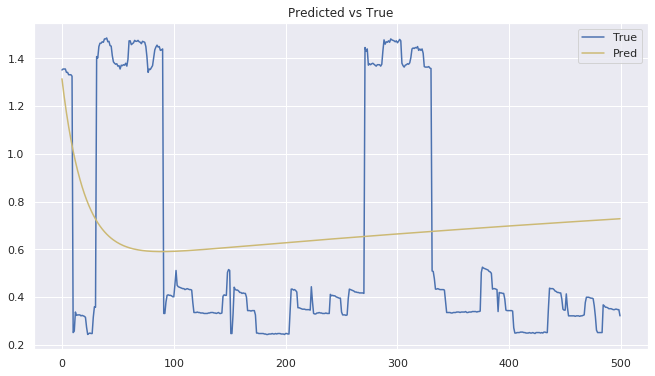

In [27]:
plt.plot(y_test[0:500], 'b')
plt.plot( prediction[0:500,7], 'y')
plt.legend(['True', 'Pred'])
plt.title('Predicted vs True')
plt.show()

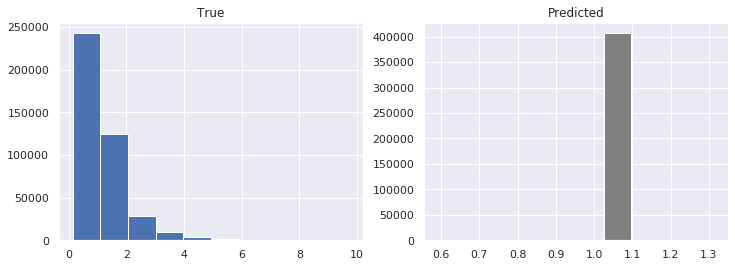

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(y_test)
plt.title('True')

plt.subplot(1,2,2)
plt.hist(prediction[:,7], color='grey')
plt.title('Predicted')
plt.show()

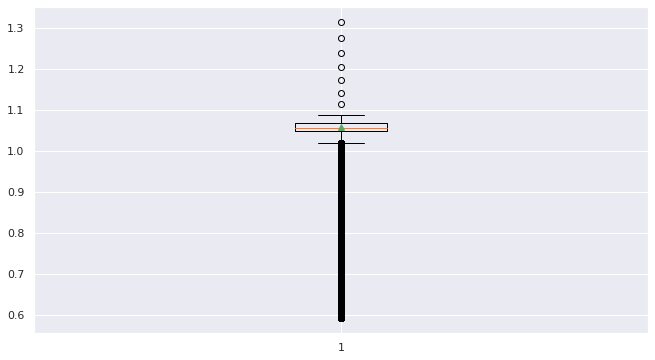

In [29]:
plt.boxplot(prediction[:,7], showmeans=True)
plt.show()

## Time Based Prediction Plot

In [30]:
tm1 = x_test[:,6]   # Test set minute values
tm2 = x_test[:,5]   # Test set hour values
tm3 = x_test[:,2]   # Test set Day values
tm4 = x_test[:,3]   # Test set Month values
tm5 = x_test[:,4]   # Test set Year values

In [31]:
# Result DataFrame without scaled values for true and predicted
res = pd.DataFrame()
res['Minute'] = tm1.astype(int)
res['Hour'] = tm2.astype(int)
res['Day'] = tm3.astype(int)
res['Month'] = tm4.astype(int)
res['Year'] = tm5.astype(int)
res['True'] = y_test
res['Predicted'] = np.squeeze(prediction[:,7])
res['Time'] = res['Minute'].map(str) +'-' +res['Hour'].map(str) +'-' \
            +res['Day'].map(str) +'-' +res['Month'].map(str) +'-' + res['Year'].map(str)

In [32]:
# Sorting result values according to time in ascending order and resetting index
res1 = res.sort_values(by=['Year','Month','Day','Hour','Minute'])
res1 = res1.reset_index(drop=True)

In [33]:
res1.head()

,Minute,Hour,Day,Month,Year,True,Predicted,Time
0,0,1,1,2,2010,1.408,0.719374,0-1-1-2-2010
1,0,1,1,2,2010,0.332,0.591241,0-1-1-2-2010
2,0,1,1,2,2010,0.248,0.609232,0-1-1-2-2010
3,1,1,1,2,2010,1.402,0.711862,1-1-1-2-2010
4,1,1,1,2,2010,0.332,0.591291,1-1-1-2-2010


/home/kirmani/anaconda3/envs/env1/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


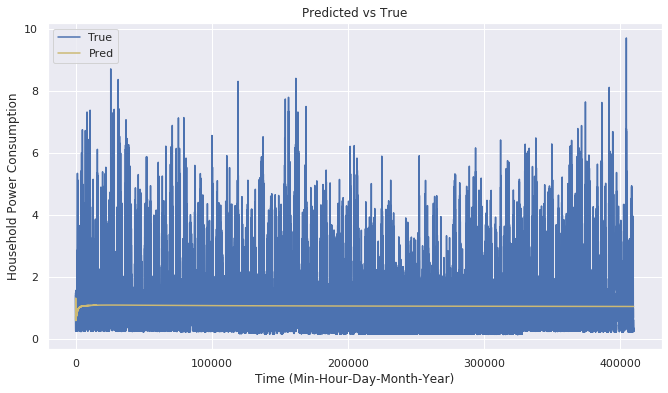

In [34]:
# Complete Test Set Plot
plt.plot(res1['True'], 'b')
plt.plot( res1['Predicted'], 'y')
plt.legend(['True', 'Pred'])
plt.title('Predicted vs True')
plt.ylabel('Household Power Consumption')
plt.xlabel('Time (Min-Hour-Day-Month-Year)')
plt.show()

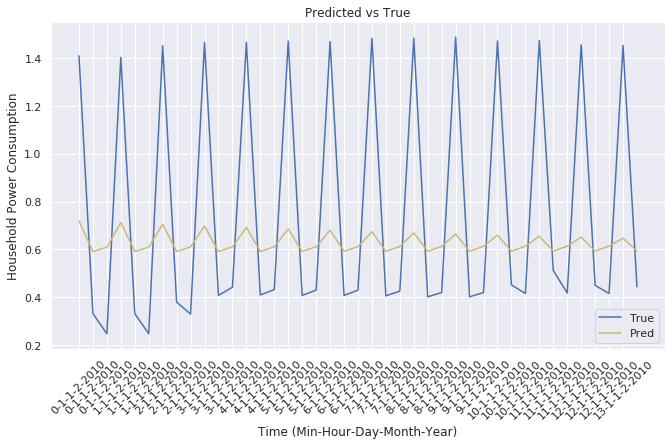

In [35]:
# First 40 Test Set Points Plot
plt.plot(res1.loc[:40,'True'], 'b')
plt.plot( res1.loc[:40,'Predicted'], 'y')
plt.legend(['True', 'Pred'])
plt.title('Predicted vs True')
# for displaying day time x-axis labels uncomment the next line
plt.xticks(ticks=np.arange(40), labels=res1.loc[:40,'Time'], rotation = 45)
plt.ylabel('Household Power Consumption')
plt.xlabel('Time (Min-Hour-Day-Month-Year)')
plt.show()